# **Scraping data about programming languages' popularity from stackoverflow survey: https://survey.stackoverflow.co/2023/#most-popular-technologies-language-learn**

## Libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import seaborn as sns
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt

## The scraping part of the code

In [8]:
url = "https://survey.stackoverflow.co/2023/"
s = Service('C:\webdrivers\chromedriver.exe')
driver = webdriver.Chrome(service=s)
driver.get(url)

WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH, '//div[@class="banner-actions-container"]//button[@id="onetrust-accept-btn-handler"]')))
cookies = driver.find_element(By.XPATH,'//div[@class="banner-actions-container"]//button[@id="onetrust-accept-btn-handler"]')
cookies.click()
driver.refresh()


all_respondents = []
professional_developers = []
learning_to_code = []


table_trs_all_respondents = driver.find_elements(By.XPATH,'//table[@id="languagev2fih"]//tbody//tr')

for each_tr_all_respondent in table_trs_all_respondents:
    language_name = each_tr_all_respondent.find_element(By.XPATH,'.//td[1]').text.strip()
    language_perc = each_tr_all_respondent.find_element(By.XPATH,'.//td[2]//span[1]').text.strip()
    all_respondents.append({"language_name":language_name,
    "language_perc":language_perc})
if len(all_respondents) == 51:
    next = driver.find_element(By.XPATH,'(//nav[@class="ds-chart-nav fs-body3 p-ff-source py24 s-navigation sm:fd-column sm:w100 w75"])[6]//a[2]')
    next.click()
    time.sleep(3)


table_trs_profs = driver.find_elements(By.XPATH,'//table[@id="language-prof787ji"]//tbody//tr')

for each_tr_profs in table_trs_profs:
    language_name = each_tr_profs.find_element(By.XPATH,'.//td[1]').text.strip()
    language_perc = each_tr_profs.find_element(By.XPATH,'.//td[2]//span[1]').text.strip()
    professional_developers.append({"language_name":language_name,
    "language_perc":language_perc})
if len(professional_developers) == 51:
    next = driver.find_element(By.XPATH,'(//nav[@class="ds-chart-nav fs-body3 p-ff-source py24 s-navigation sm:fd-column sm:w100 w75"])[6]//a[3]')
    next.click()
    time.sleep(3)



table_trs_learn = driver.find_elements(By.XPATH,'//table[@id="language-learne514d"]//tbody//tr')

for each_tr_learn in table_trs_learn:
    language_name = each_tr_learn.find_element(By.XPATH,'.//td[1]').text.strip()
    language_perc = each_tr_learn.find_element(By.XPATH,'.//td[2]//span[1]').text.strip()
    learning_to_code.append({"language_name":language_name,
    "language_perc":language_perc})
    

In [9]:
all_respondents

[{'language_name': 'JavaScript', 'language_perc': '63.61%'},
 {'language_name': 'HTML/CSS', 'language_perc': '52.97%'},
 {'language_name': 'Python', 'language_perc': '49.28%'},
 {'language_name': 'SQL', 'language_perc': '48.66%'},
 {'language_name': 'TypeScript', 'language_perc': '38.87%'},
 {'language_name': 'Bash/Shell (all shells)', 'language_perc': '32.37%'},
 {'language_name': 'Java', 'language_perc': '30.55%'},
 {'language_name': 'C#', 'language_perc': '27.62%'},
 {'language_name': 'C++', 'language_perc': '22.42%'},
 {'language_name': 'C', 'language_perc': '19.34%'},
 {'language_name': 'PHP', 'language_perc': '18.58%'},
 {'language_name': 'PowerShell', 'language_perc': '13.59%'},
 {'language_name': 'Go', 'language_perc': '13.24%'},
 {'language_name': 'Rust', 'language_perc': '13.05%'},
 {'language_name': 'Kotlin', 'language_perc': '9.06%'},
 {'language_name': 'Ruby', 'language_perc': '6.23%'},
 {'language_name': 'Lua', 'language_perc': '6.09%'},
 {'language_name': 'Dart', 'langua

In [10]:
professional_developers

[{'language_name': 'JavaScript', 'language_perc': '65.82%'},
 {'language_name': 'HTML/CSS', 'language_perc': '52.83%'},
 {'language_name': 'SQL', 'language_perc': '51.52%'},
 {'language_name': 'Python', 'language_perc': '45.32%'},
 {'language_name': 'TypeScript', 'language_perc': '43.75%'},
 {'language_name': 'Bash/Shell (all shells)', 'language_perc': '32.74%'},
 {'language_name': 'Java', 'language_perc': '30.49%'},
 {'language_name': 'C#', 'language_perc': '29.16%'},
 {'language_name': 'C++', 'language_perc': '20.21%'},
 {'language_name': 'PHP', 'language_perc': '19.03%'},
 {'language_name': 'C', 'language_perc': '16.66%'},
 {'language_name': 'Go', 'language_perc': '14.32%'},
 {'language_name': 'PowerShell', 'language_perc': '13.61%'},
 {'language_name': 'Rust', 'language_perc': '12.21%'},
 {'language_name': 'Kotlin', 'language_perc': '9.7%'},
 {'language_name': 'Ruby', 'language_perc': '6.94%'},
 {'language_name': 'Dart', 'language_perc': '6.13%'},
 {'language_name': 'Lua', 'languag

In [11]:
learning_to_code

[{'language_name': 'HTML/CSS', 'language_perc': '60.73%'},
 {'language_name': 'JavaScript', 'language_perc': '60.51%'},
 {'language_name': 'Python', 'language_perc': '56.57%'},
 {'language_name': 'SQL', 'language_perc': '35.29%'},
 {'language_name': 'Java', 'language_perc': '35.17%'},
 {'language_name': 'C++', 'language_perc': '31.11%'},
 {'language_name': 'C', 'language_perc': '30.58%'},
 {'language_name': 'Bash/Shell (all shells)', 'language_perc': '22.14%'},
 {'language_name': 'TypeScript', 'language_perc': '21.18%'},
 {'language_name': 'C#', 'language_perc': '20.63%'},
 {'language_name': 'PHP', 'language_perc': '15.27%'},
 {'language_name': 'Rust', 'language_perc': '10.95%'},
 {'language_name': 'PowerShell', 'language_perc': '9.87%'},
 {'language_name': 'Assembly', 'language_perc': '7.77%'},
 {'language_name': 'Lua', 'language_perc': '6.97%'},
 {'language_name': 'Kotlin', 'language_perc': '6.67%'},
 {'language_name': 'Go', 'language_perc': '6.18%'},
 {'language_name': 'Dart', 'lang

## Cleaning the data

In [13]:
all_respondents = pd.DataFrame(all_respondents)
professional_developers = pd.DataFrame(professional_developers)
learning_to_code = pd.DataFrame(learning_to_code)

In [19]:
all_respondents = all_respondents.sort_values('language_name')
professional_developers = professional_developers.sort_values('language_name')
learning_to_code = learning_to_code.sort_values('language_name')

In [28]:
df = pd.merge(pd.merge(all_respondents,professional_developers,on="language_name",how="inner"), learning_to_code, on ="language_name")
df.rename(columns={"language_perc_x":"all_respondents",
"language_perc_y":"professional_developers",
"language_perc":"learning_to_code"},inplace=True)

In [39]:
df.dtypes

language_name              object
all_respondents            object
professional_developers    object
learning_to_code           object
dtype: object

In [41]:
df.columns.to_list()

['language_name',
 'all_respondents',
 'professional_developers',
 'learning_to_code']

In [48]:
df.head(3)

,language_name,all_respondents,professional_developers,learning_to_code
0,APL,0.26%,0.16%,0.55%
1,Ada,0.77%,0.65%,1.16%
2,Apex,0.66%,0.64%,0.49%


In [49]:
for colname in df.columns.to_list():
    if colname != "language_name":
        df[colname] = df[colname].apply(lambda x: x.replace("%","").strip())
        df[colname] = pd.to_numeric(df[colname])

In [54]:
df = df.sort_values("all_respondents",ascending=False)

In [57]:
df = pd.melt(df, id_vars = "language_name", value_vars = ["all_respondents","professional_developers","learning_to_code"])

In [58]:
df

,language_name,variable,value
0,JavaScript,all_respondents,63.61
1,HTML/CSS,all_respondents,52.97
2,Python,all_respondents,49.28
3,SQL,all_respondents,48.66
4,TypeScript,all_respondents,38.87
...,...,...,...
148,Crystal,learning_to_code,0.37
149,Nim,learning_to_code,0.41
150,APL,learning_to_code,0.55
151,Flow,learning_to_code,0.27


In [79]:
df[df["language_name"]=="JavaScript"]

,language_name,variable,value
0,JavaScript,all_respondents,63.61
51,JavaScript,professional_developers,65.82
102,JavaScript,learning_to_code,60.51


## Data visualization

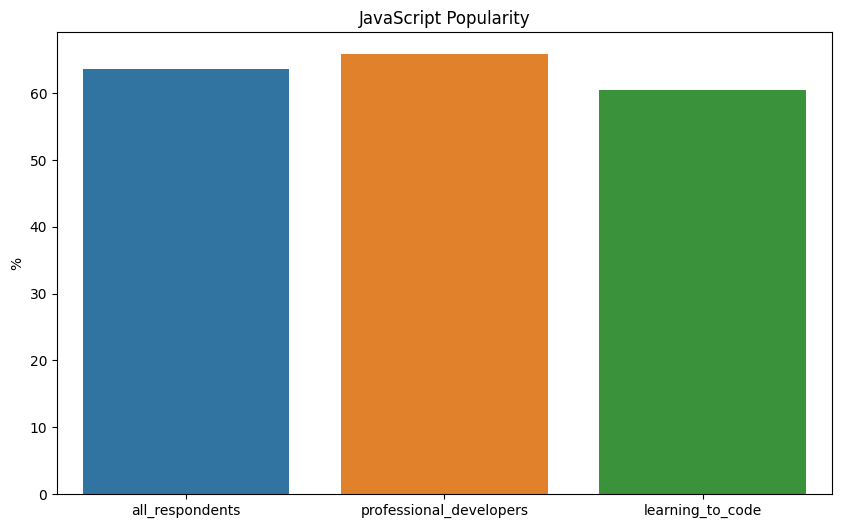

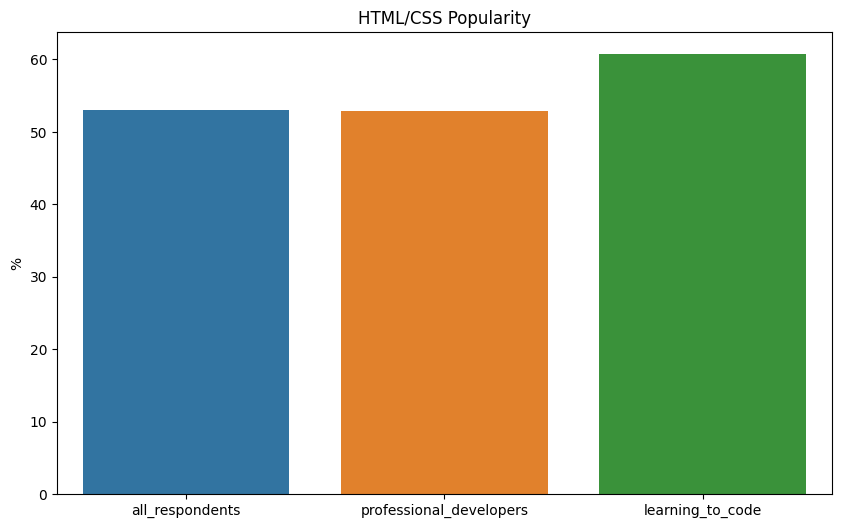

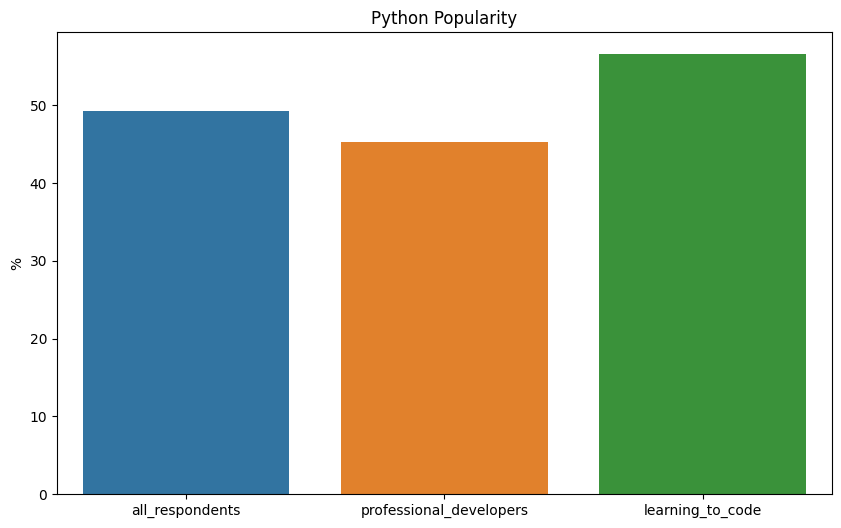

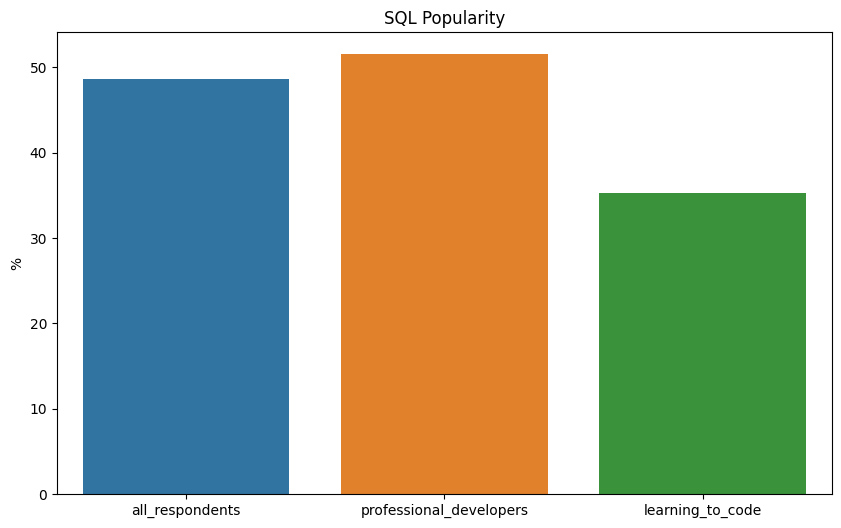

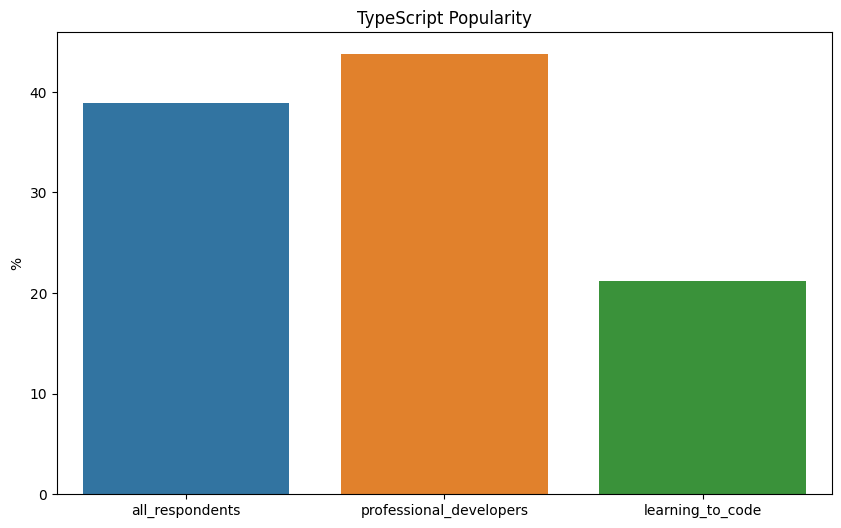

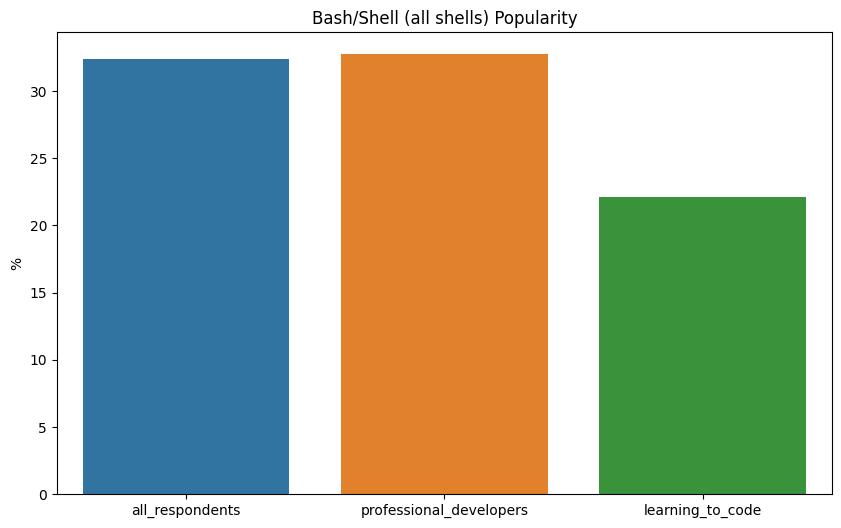

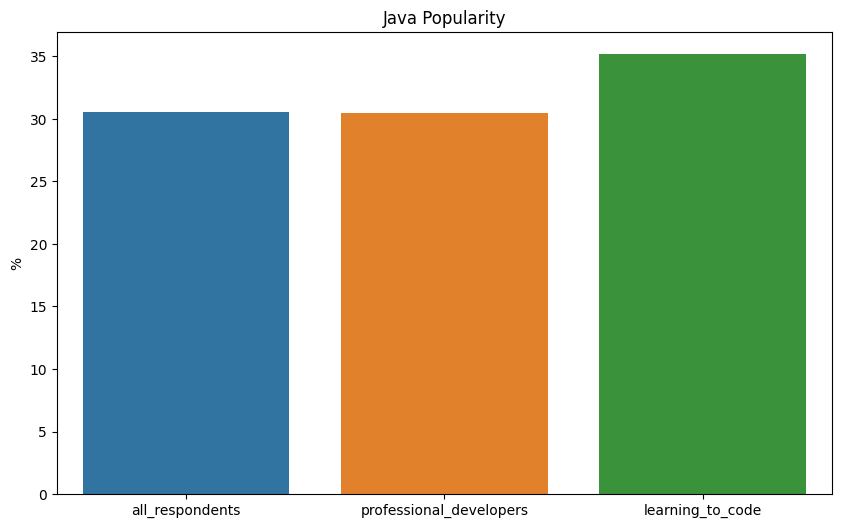

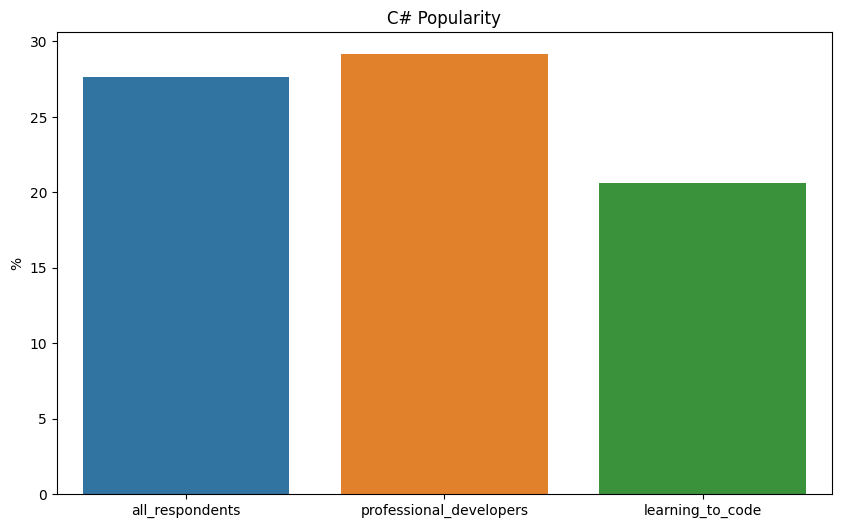

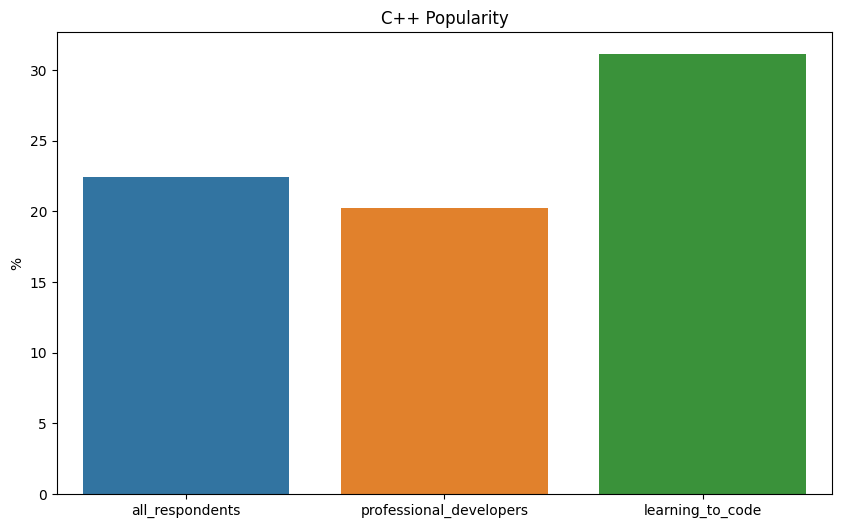

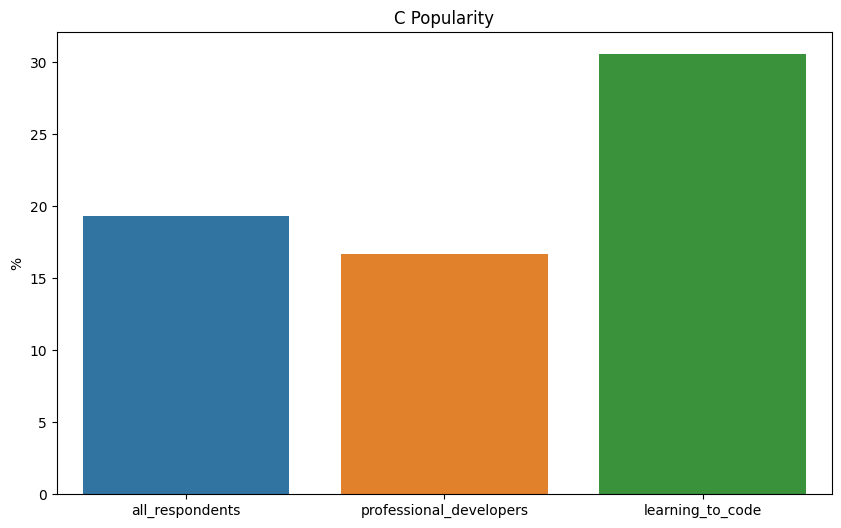

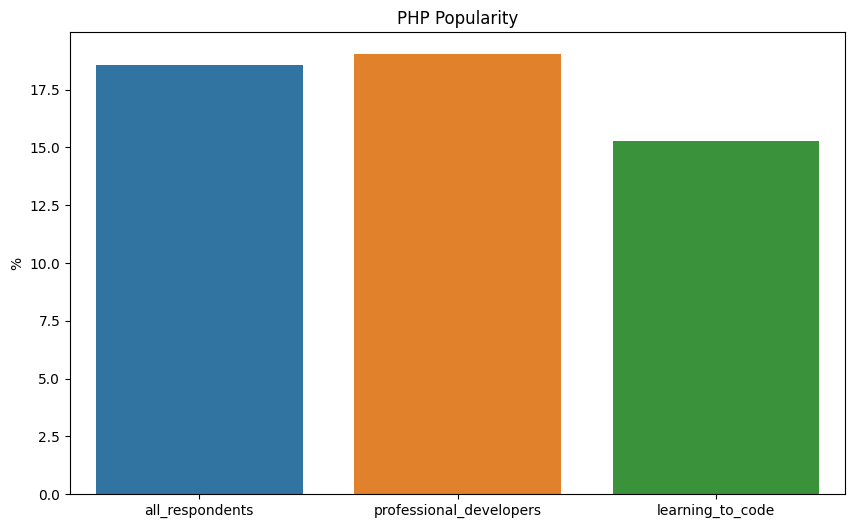

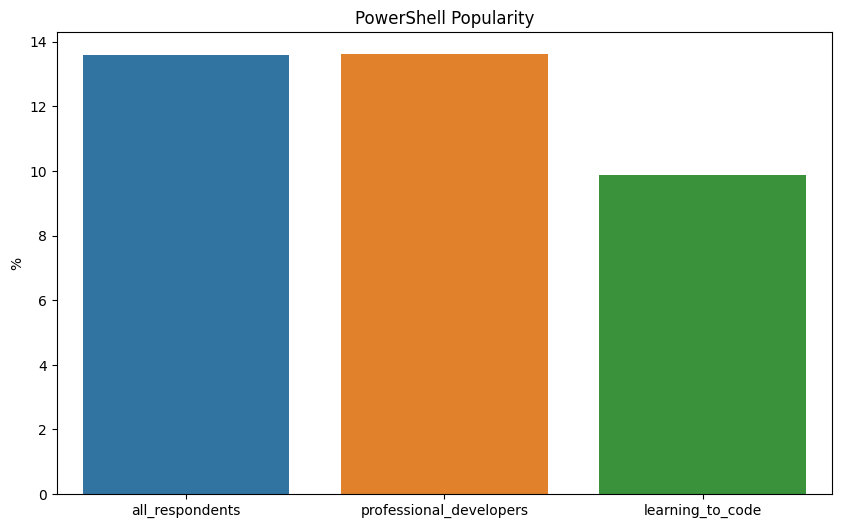

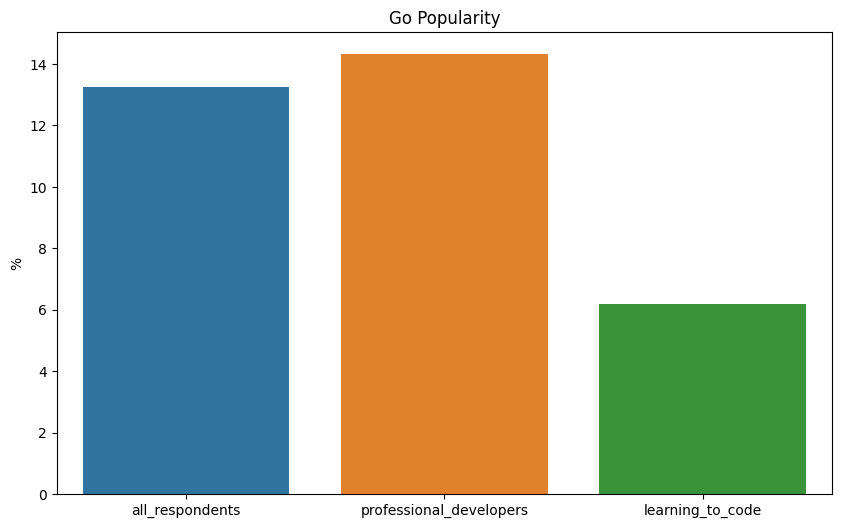

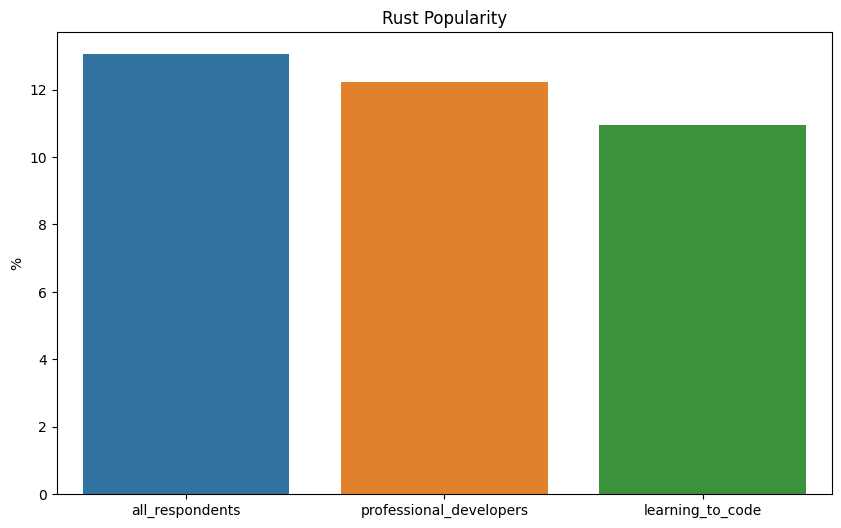

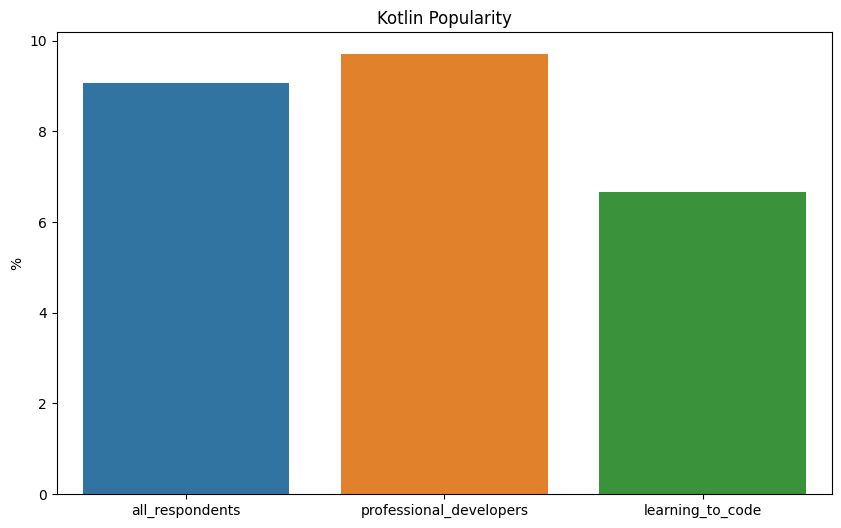

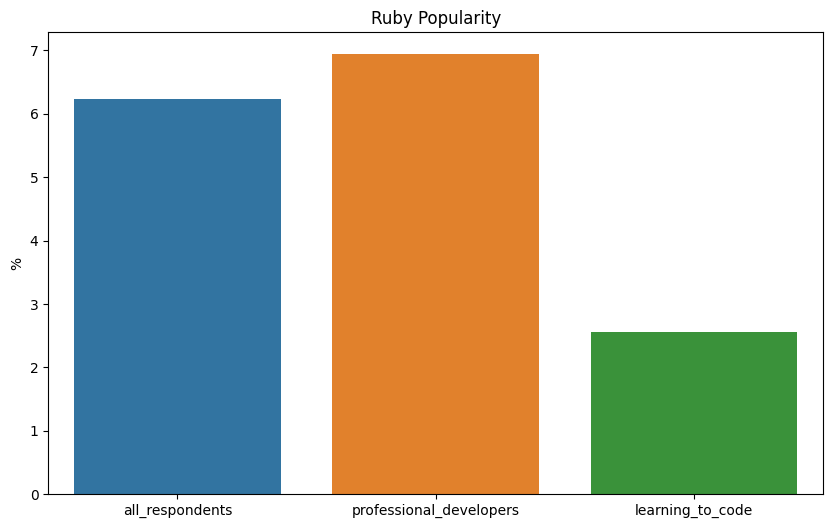

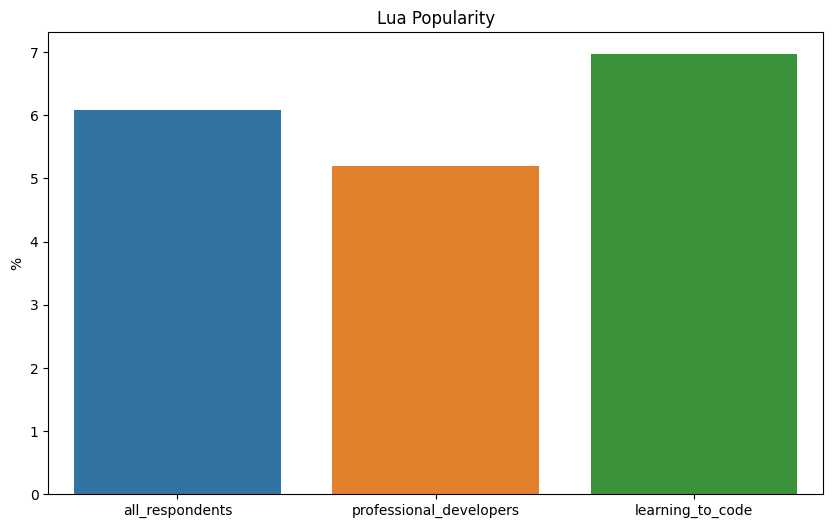

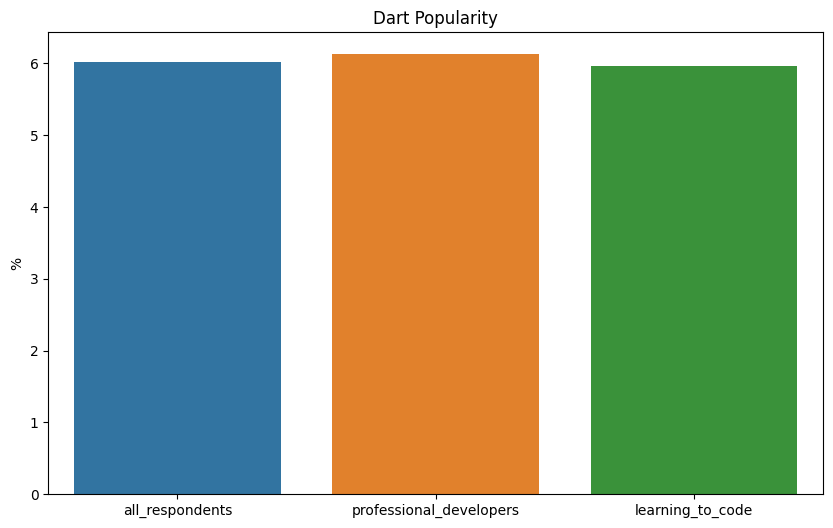

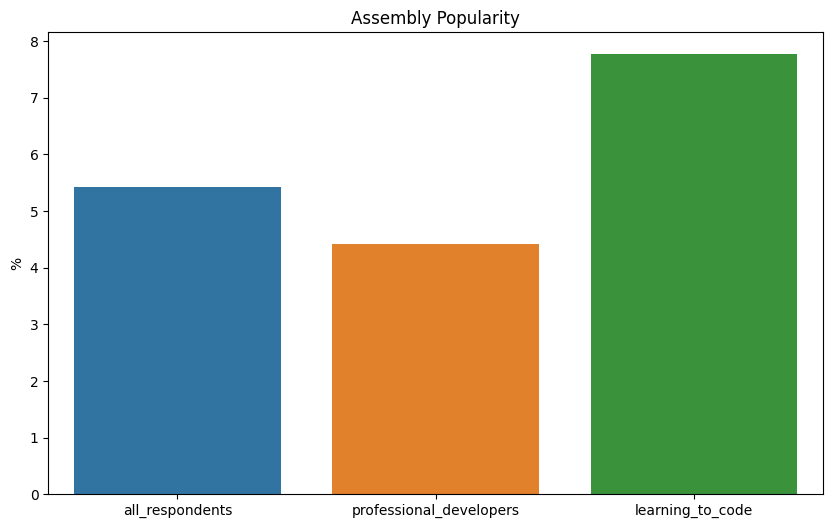

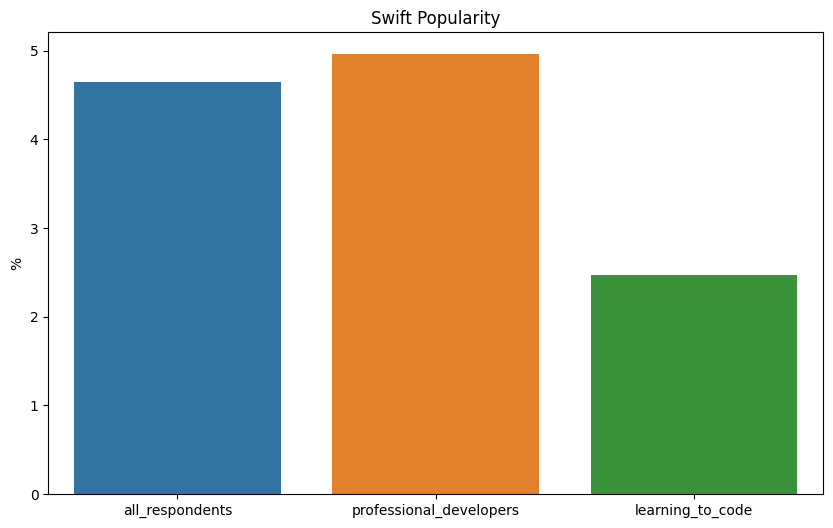

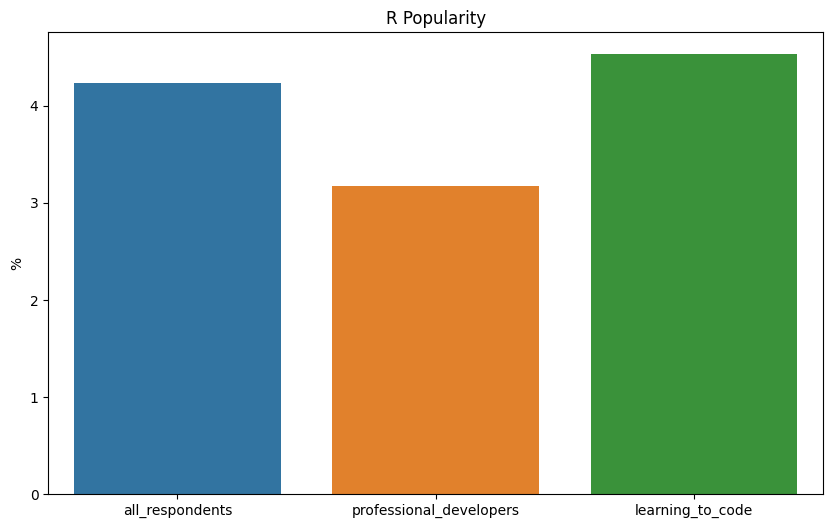

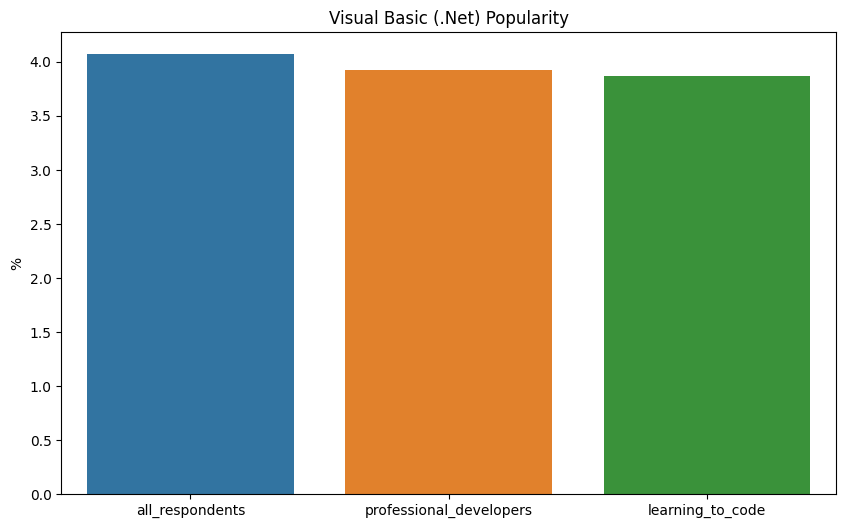

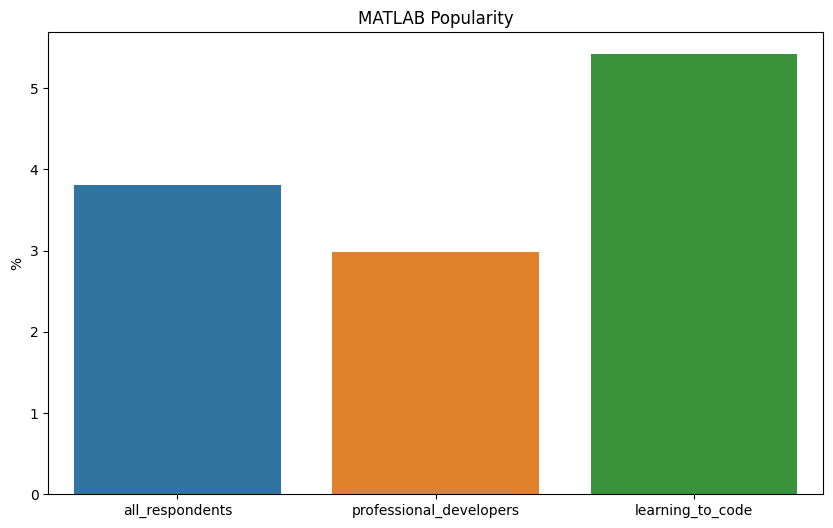

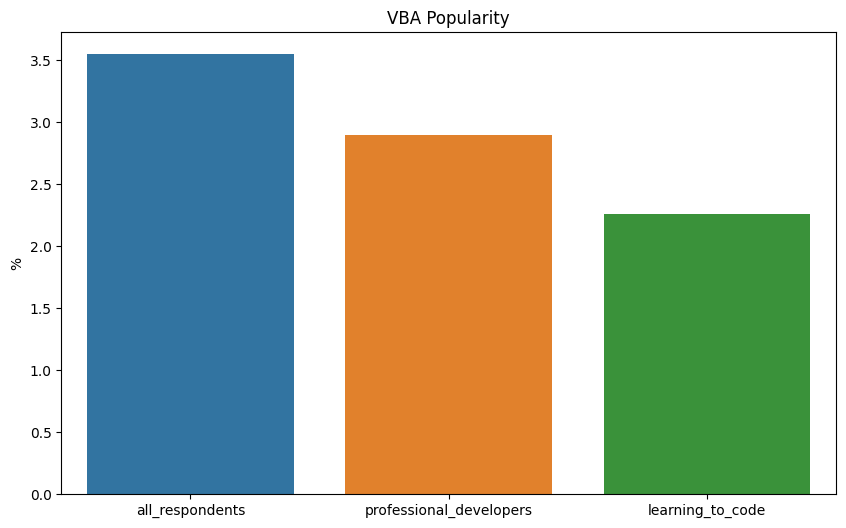

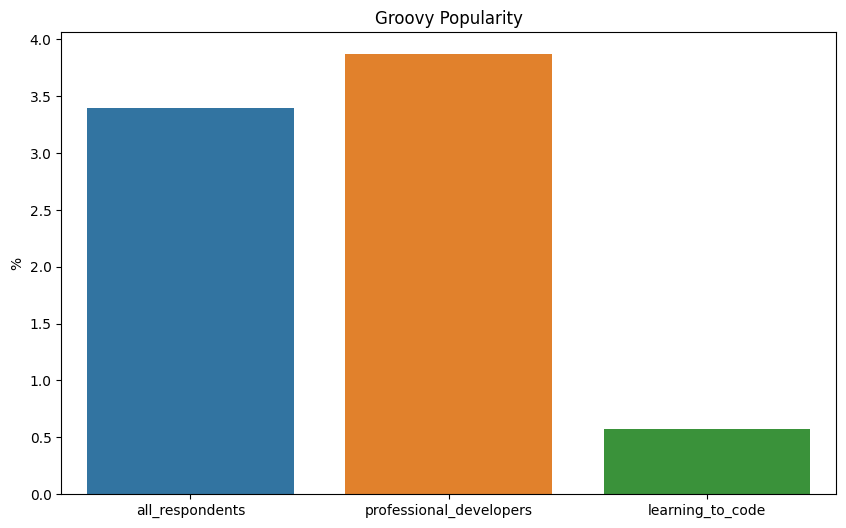

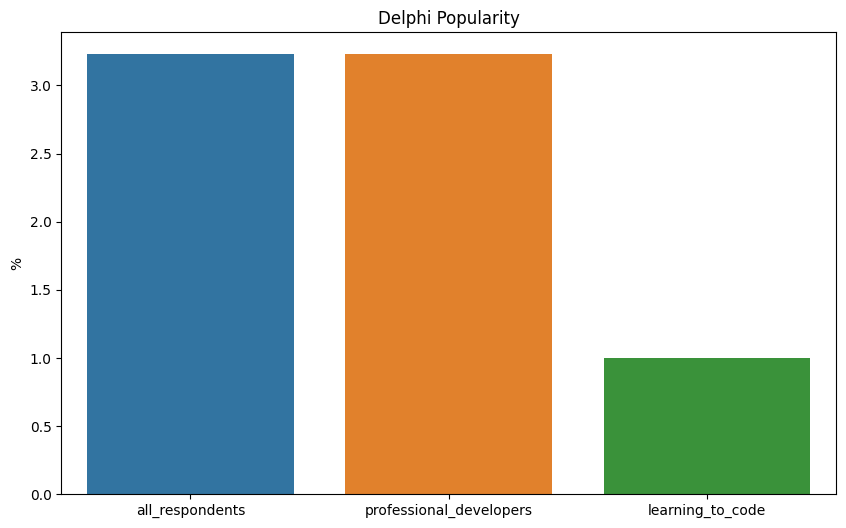

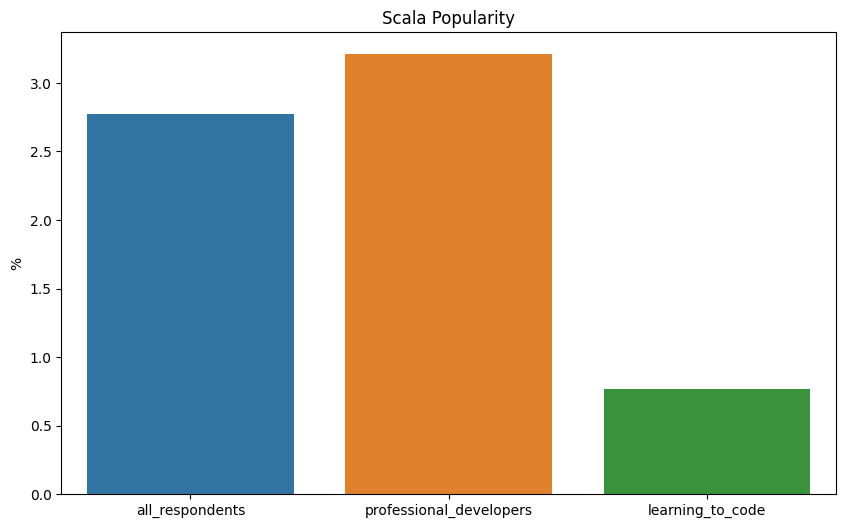

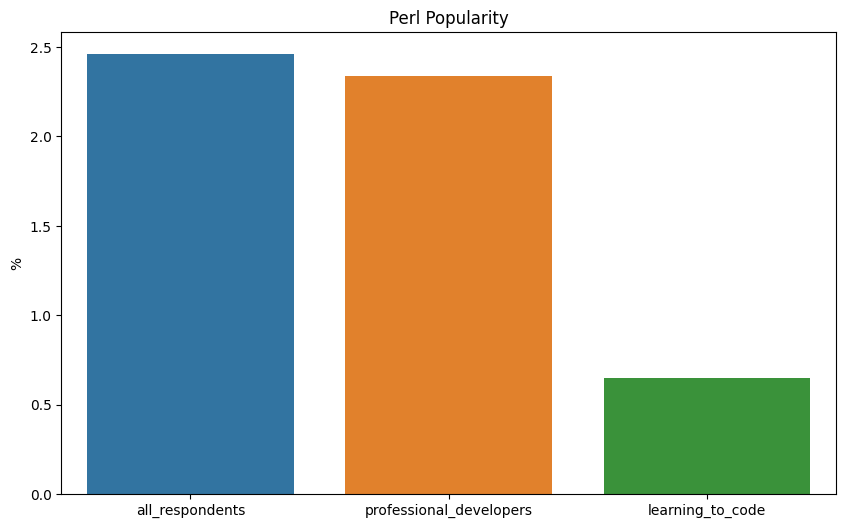

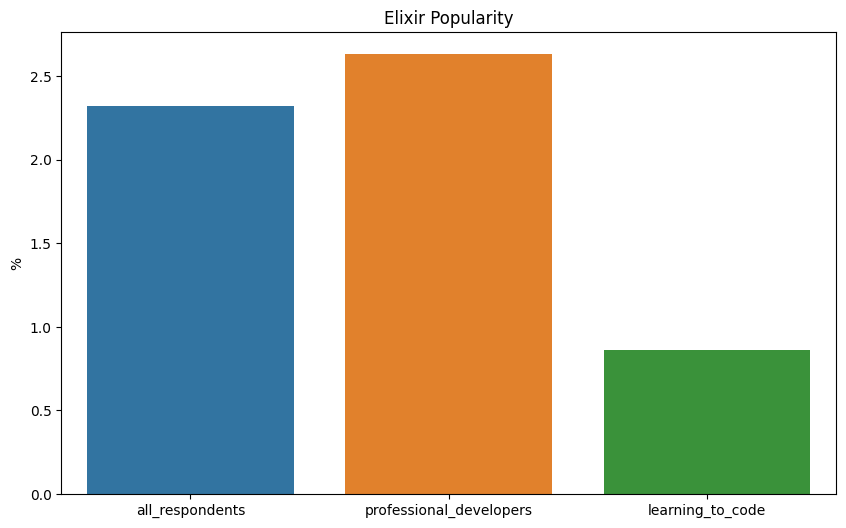

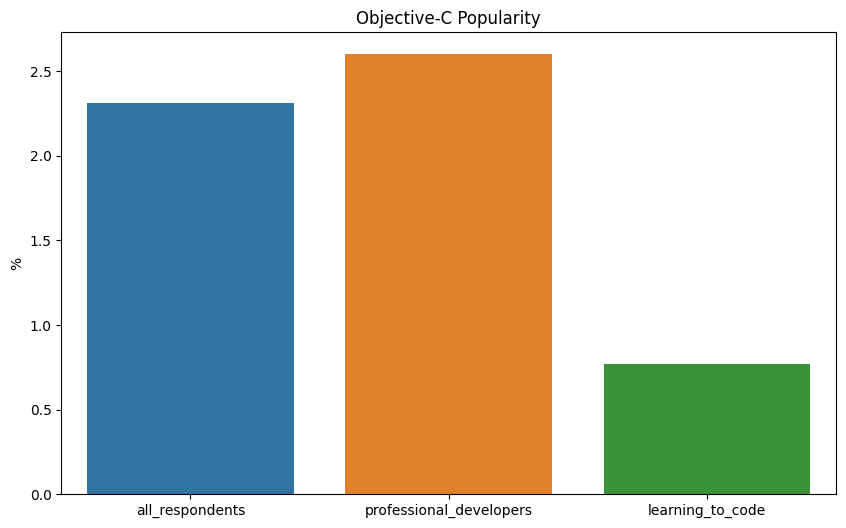

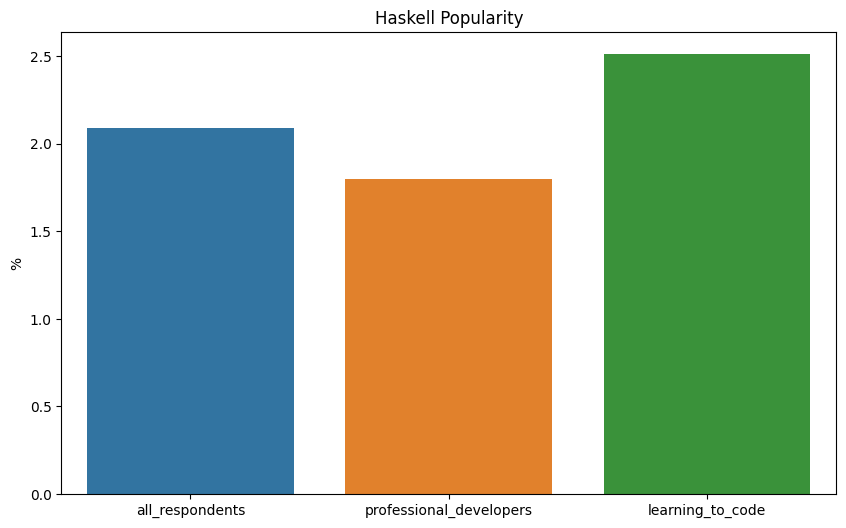

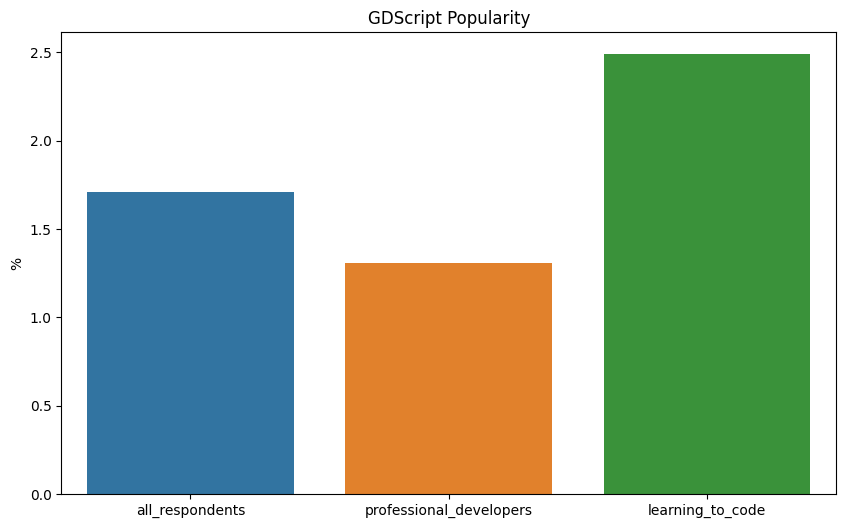

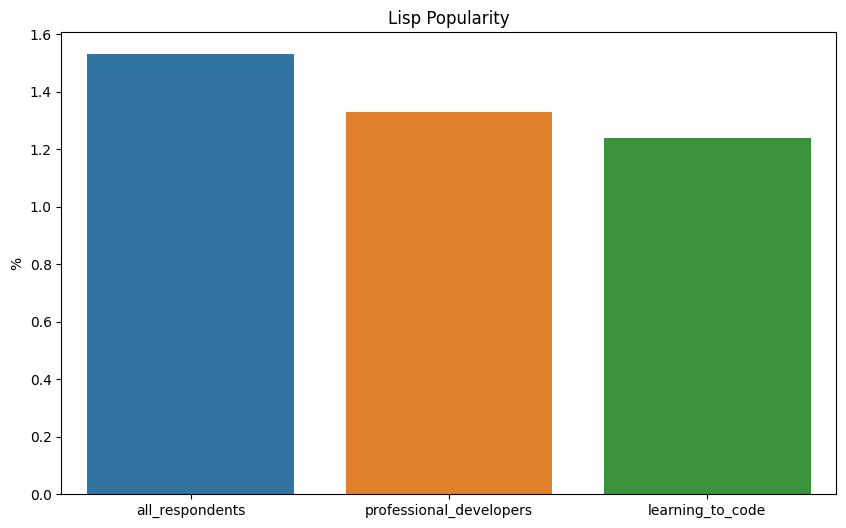

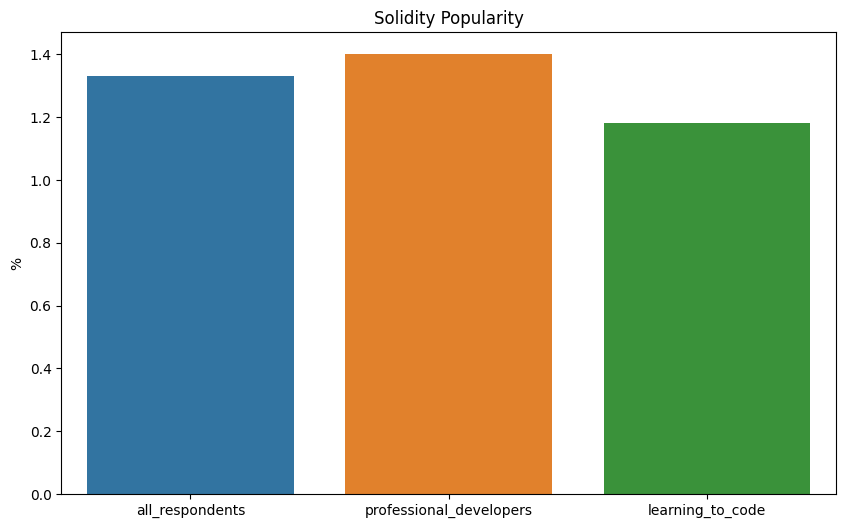

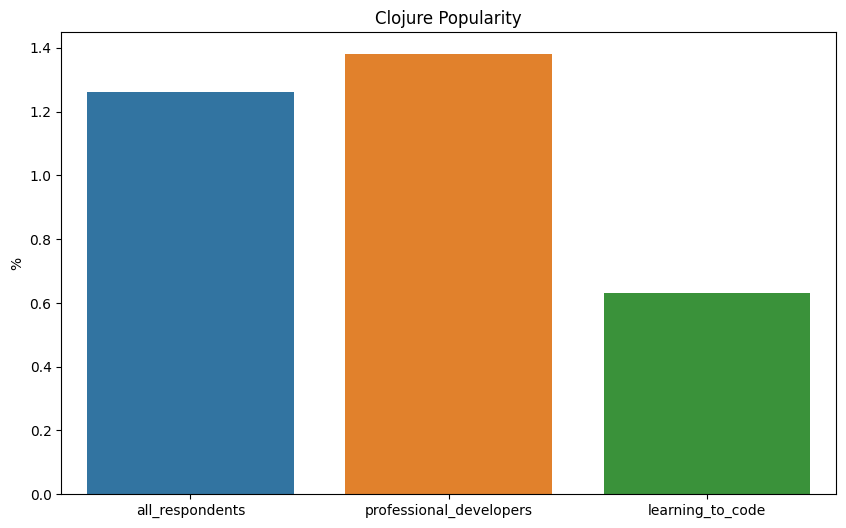

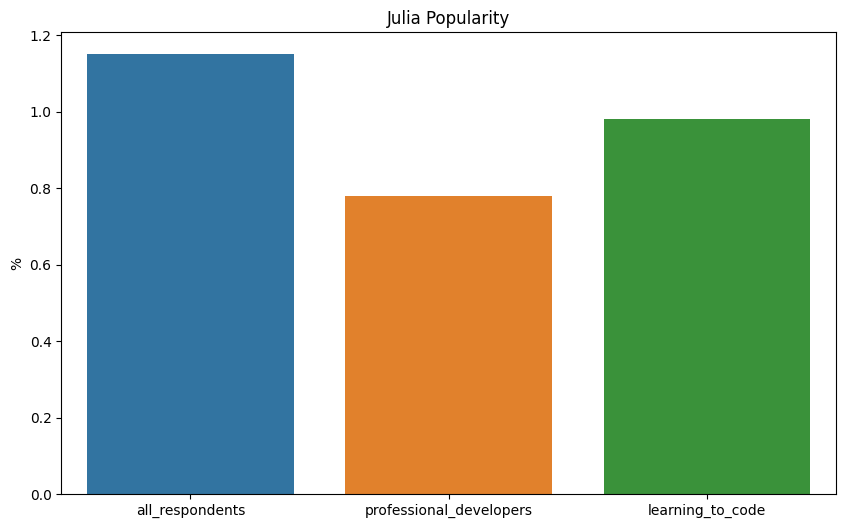

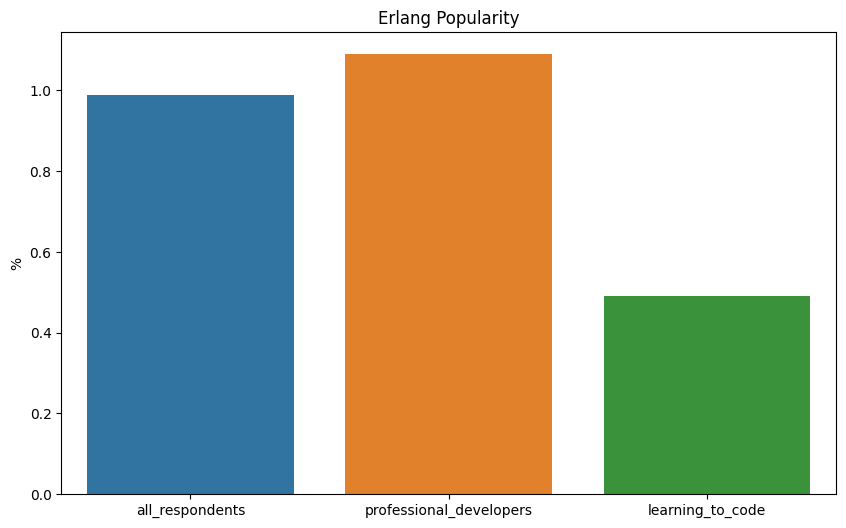

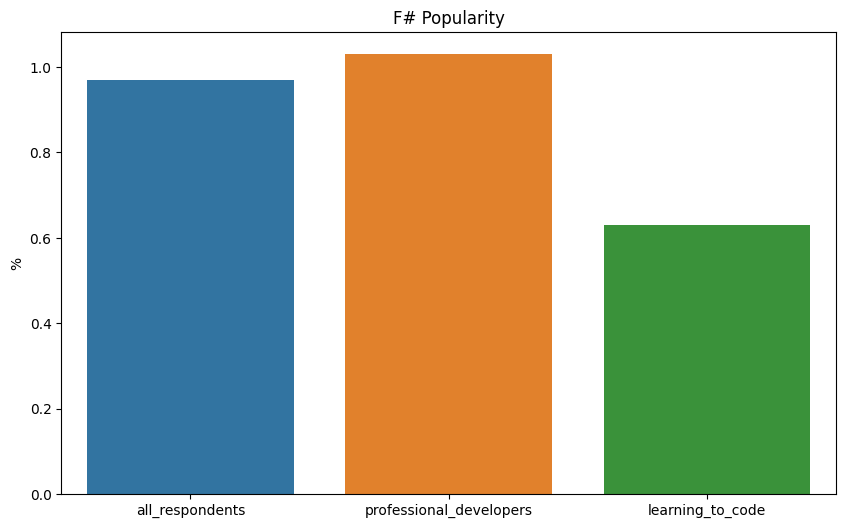

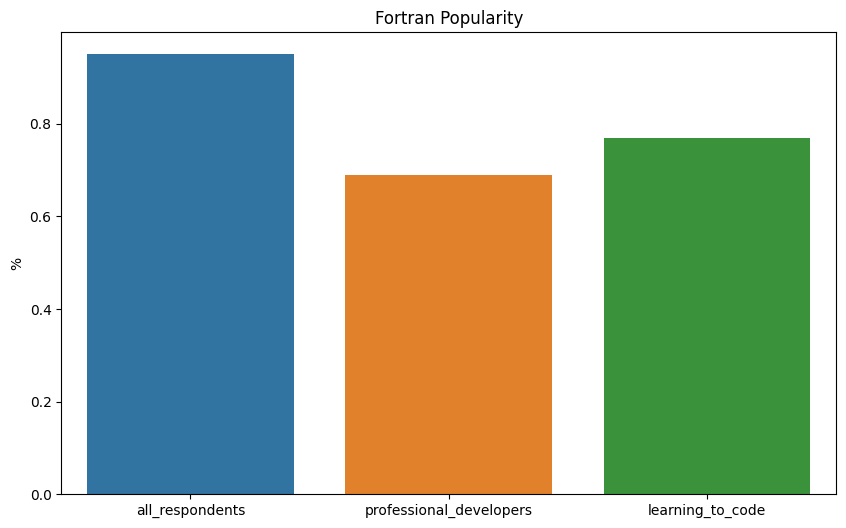

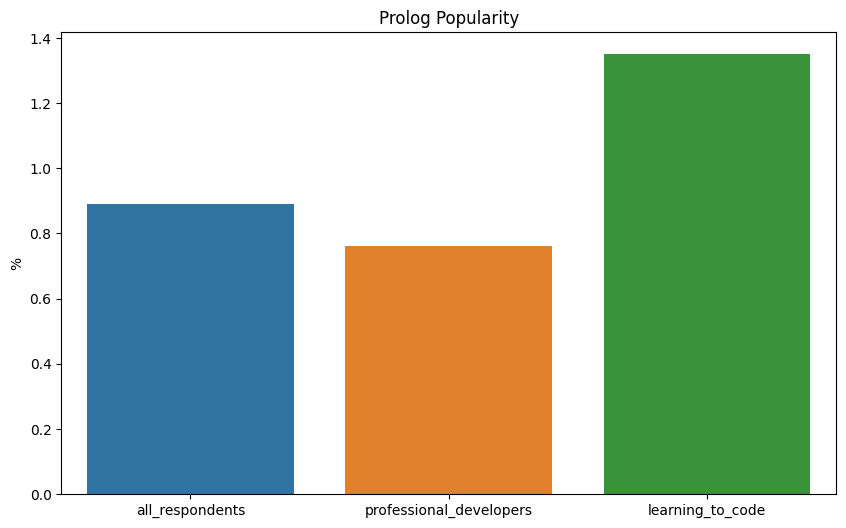

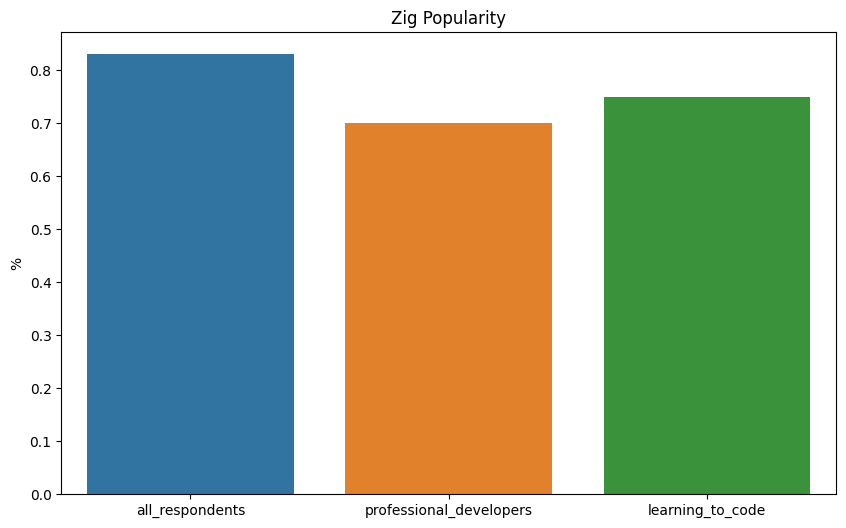

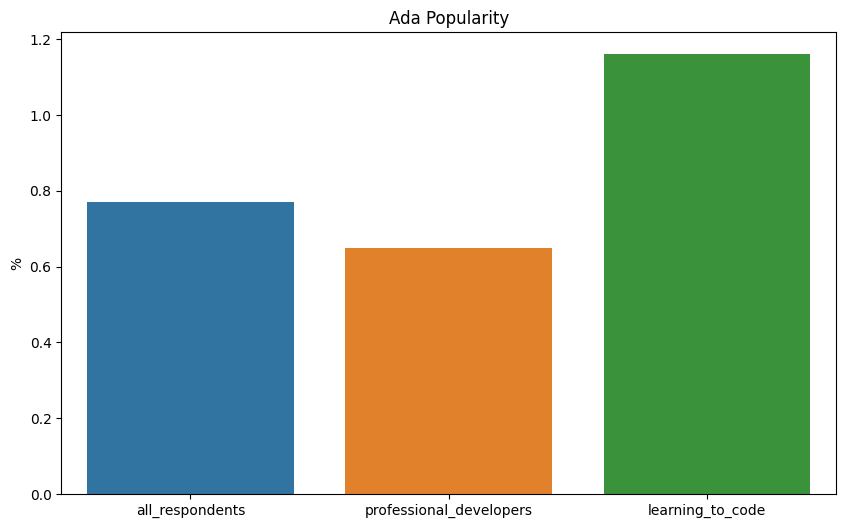

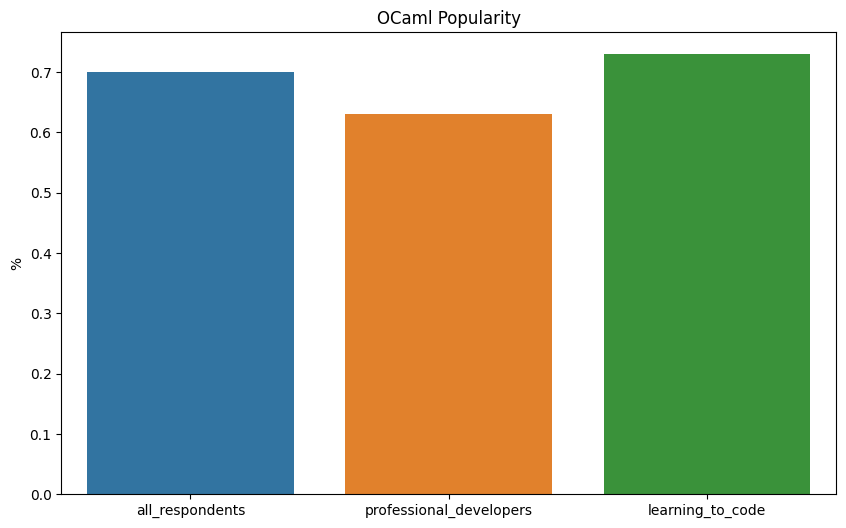

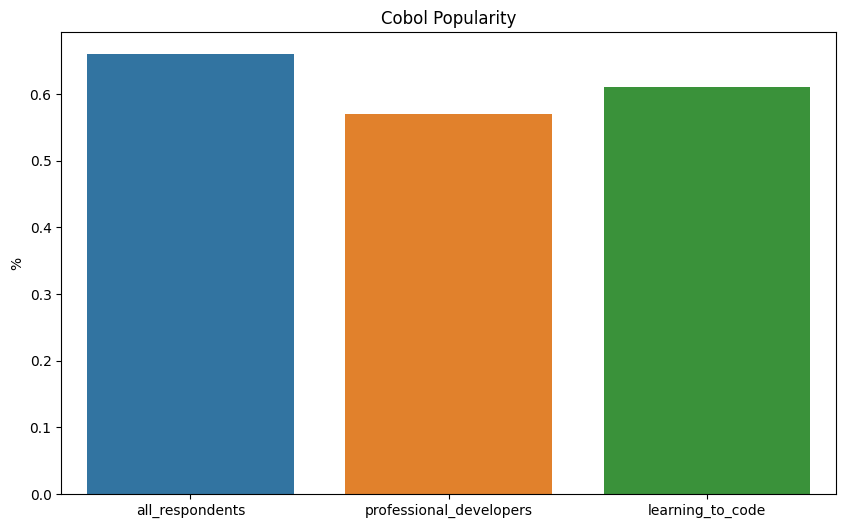

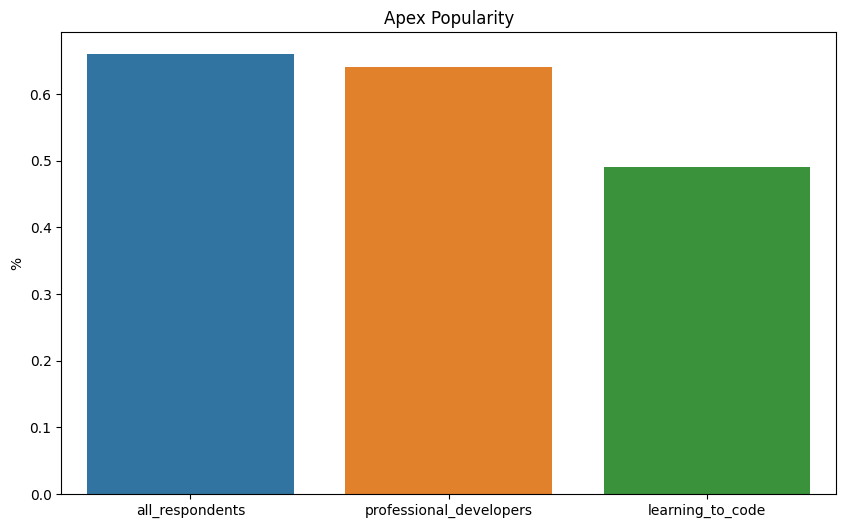

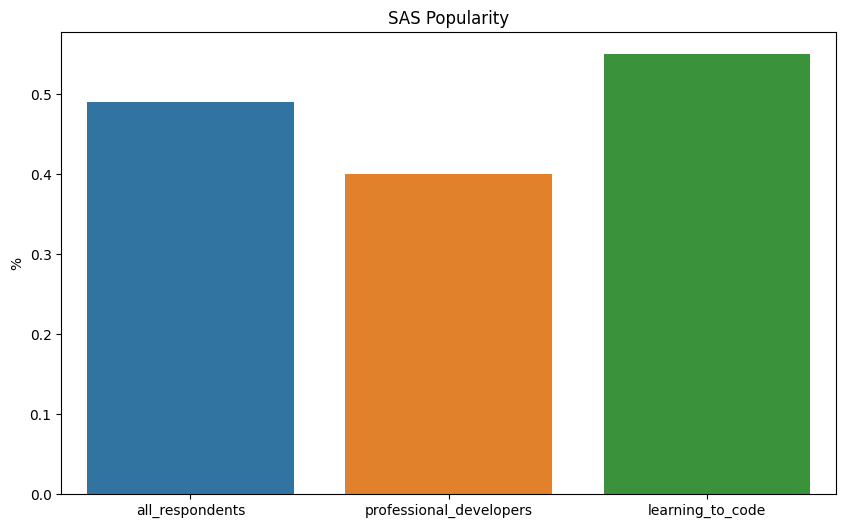

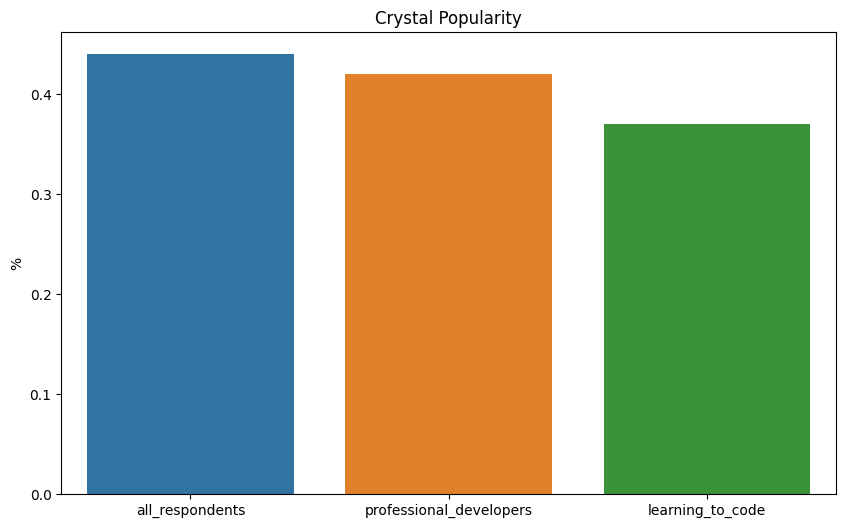

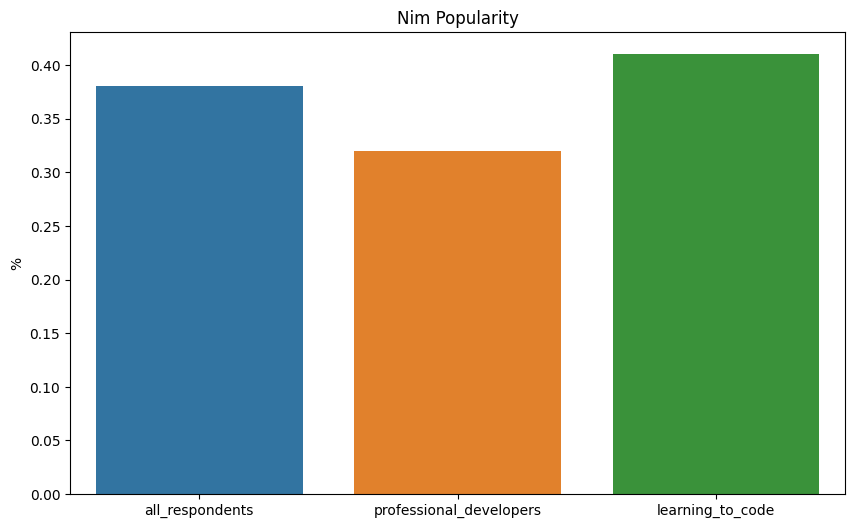

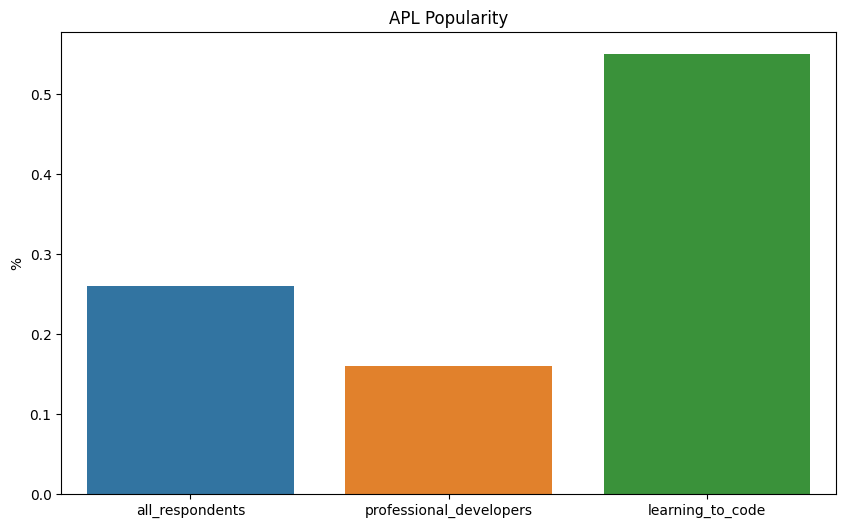

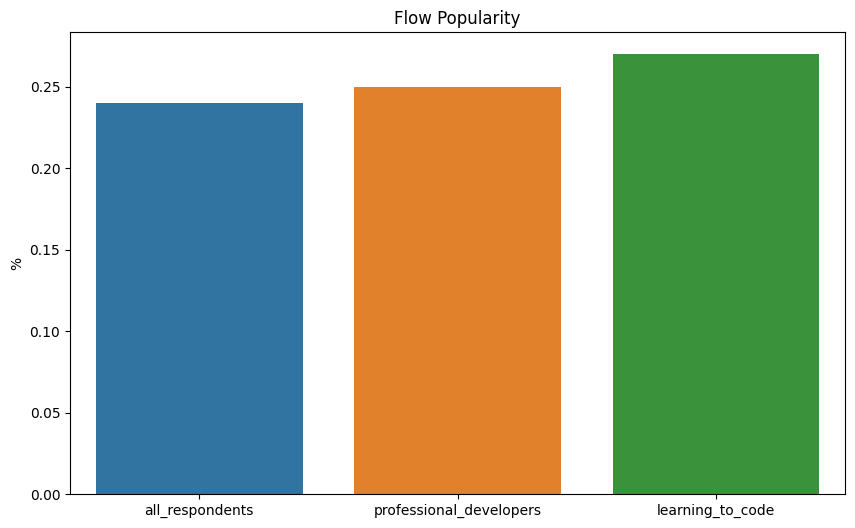

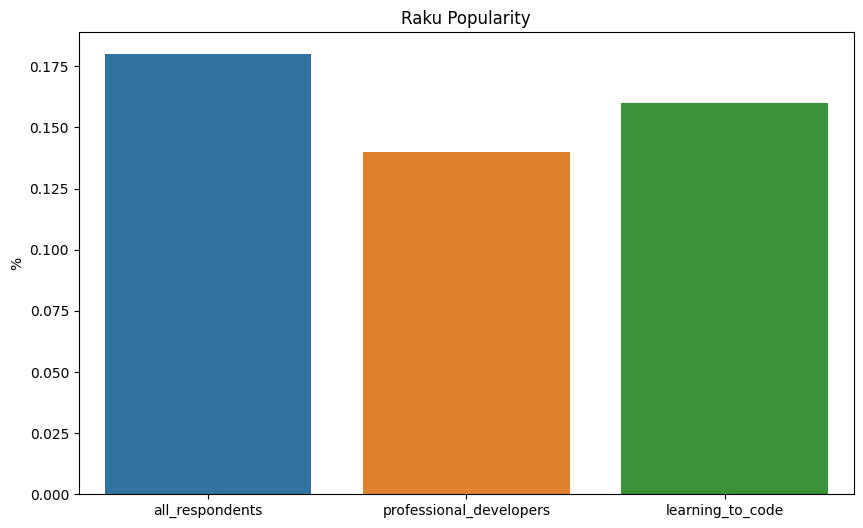

In [86]:
for language in df['language_name'].unique():
    plt.figure(figsize=(10,6))
    sns.barplot(data = df[df['language_name'] == language],
    x="variable",
    y="value")
    plt.title(f"{language} Popularity") 
    plt.xlabel("")
    plt.ylabel("%")
    plt.show()